# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.shape

(27028, 69)

In [5]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
latitude = pd.cut(sinasc_raw['munResLat'], [-20, -10.5, 20])

COD = sinasc_raw.pivot_table(values=['CODESTAB', 'CODOCUPMAE'],
                                          index=['SEXO', latitude],
                                          aggfunc={'CODESTAB': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'CODOCUPMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
COD

CODESTAB                                      \
                                max          mean     median        min   
SEXO      munResLat                                                       
Feminino  (-20.0, -10.5]  7648693.0  2.904158e+06  2515989.0    15318.0   
          (-10.5, 20.0]   7920628.0  3.611895e+06  3970442.0    26794.0   
Masculino (-20.0, -10.5]  9659366.0  2.929355e+06  2515989.0    15318.0   
          (-10.5, 20.0]   7648693.0  3.573893e+06  3970442.0  2000733.0   

                                                                   CODOCUPMAE  \
                                   std           sum           var        max   
SEXO      munResLat                                                             
Feminino  (-20.0, -10.5]  1.047567e+06  1.849658e+10  1.097397e+12   999994.0   
          (-10.5, 20.0]   1.077486e+06  2.424665e+10  1.160976e+12   999994.0   
Masculino (-20.0, -10.5]  1.082586e+06  1.925172e+10  1.171992e+12   999994.0   
          (-10.5, 20.0]   1.073019e+06  2.592502e+10  1.151369e+12   999994.0   

                                                                           \
                                   mean    median      min            std   
SEXO      munResLat                                                         
Feminino  (-20.0, -10.5]  779182.543857  999992.0  21205.0  286862.935775   
          (-10.5, 20.0]   811997.114300  999992.0  21205.0  281939.355493   
Masculino (-20.0, -10.5]  781742.632555  999992.0  21205.0  284118.602468   
          (-10.5, 20.0]   807147.866555  999992.0  10205.0  281514.950650   

                                                      
                                   sum           var  
SEXO      munResLat                                   
Feminino  (-20.0, -10.5]  4.432769e+09  8.229034e+10  
          (-10.5, 20.0]   4.923139e+09  7.948980e+10  
Masculino (-20.0, -10.5]  4.552869e+09  8.072338e+10  
          (-10.5, 20.0]   5.280361e+09  7.925067e+10

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:
area = pd.cut(sinasc_raw['munResArea'], [1800, 3000, 4200])

MED = sinasc_raw.pivot_table(values=['APGAR1', 'APGAR5'],
                                          index=['SEXO', area],
                                          aggfunc={'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'APGAR5': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
MED

APGAR1                                           \
                          max      mean median  min       std      sum   
SEXO      munResArea                                                     
Feminino  (1800, 3000]   10.0  8.144395    8.0  1.0  0.926254   9081.0   
          (3000, 4200]   10.0  8.178799    8.0  1.0  0.880726  12808.0   
Masculino (1800, 3000]   10.0  8.129717    8.0  0.0  0.977962  10341.0   
          (3000, 4200]   10.0  8.174505    8.0  0.0  1.026820  13210.0   

                                 APGAR5                                  \
                             var    max      mean median  min       std   
SEXO      munResArea                                                      
Feminino  (1800, 3000]  0.857947   10.0  9.161435    9.0  1.0  0.759702   
          (3000, 4200]  0.775678   10.0  9.290096    9.0  1.0  0.757864   
Masculino (1800, 3000]  0.956410   10.0  9.180960    9.0  0.0  0.758355   
          (3000, 4200]  1.054359   10.0  9.306931    9.0  1.0  0.747239   

                                           
                            sum       var  
SEXO      munResArea                       
Feminino  (1800, 3000]  10215.0  0.577147  
          (3000, 4200]  14539.0  0.574358  
Masculino (1800, 3000]  11669.0  0.575102  
          (3000, 4200]  15040.0  0.558367

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
faixa_tres = pd.cut(sinasc_raw['munResAlt'], 4)

nasc_tres = sinasc_raw.pivot_table(values='PESO',
                                          index=['SEXO', faixa_tres],
                                          aggfunc={'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
nasc_tres

max         mean  median   min         std  \
SEXO      munResAlt                                                     
Feminino  (84.49, 212.5]  5470  3184.077578  3215.0   295  536.054393   
          (212.5, 340.0]  4915  3171.709434  3195.0   320  497.035045   
          (340.0, 467.5]  4888  3186.313187  3255.0   258  578.690812   
          (467.5, 595.0]  4704  3180.863517  3230.0   465  533.012957   
Masculino (84.49, 212.5]  5480  3308.292120  3335.0   292  546.836608   
          (212.5, 340.0]  5985  3271.432905  3310.0   285  565.679870   
          (340.0, 467.5]  4575  3300.913978  3350.0  1025  540.994862   
          (467.5, 595.0]  4920  3275.700483  3332.5   425  570.086546   

                               sum            var  
SEXO      munResAlt                                
Feminino  (84.49, 212.5]  32916994  287354.312062  
          (212.5, 340.0]   5883521  247043.836238  
          (340.0, 467.5]    579909  334883.056068  
          (467.5, 595.0]   2423818  284102.811834  
Masculino (84.49, 212.5]  36149708  299030.275449  
          (212.5, 340.0]   6362937  319993.714760  
          (340.0, 467.5]    613970  292675.441209  
          (467.5, 595.0]   2712280  324998.669552

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [11]:
# lista regiões de imediatas
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Governador Jorge Teixeira": "Jaru",
    "Jaru": "Jaru",
    "Machadinho d'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada d'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Alta Floresta d'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão d'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia d'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia d'Oeste": "Cacoal",
    "São Felipe d'Oeste": "Cacoal",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}

<AxesSubplot:xlabel='média idade mãe', ylabel='regiões imediatas'>

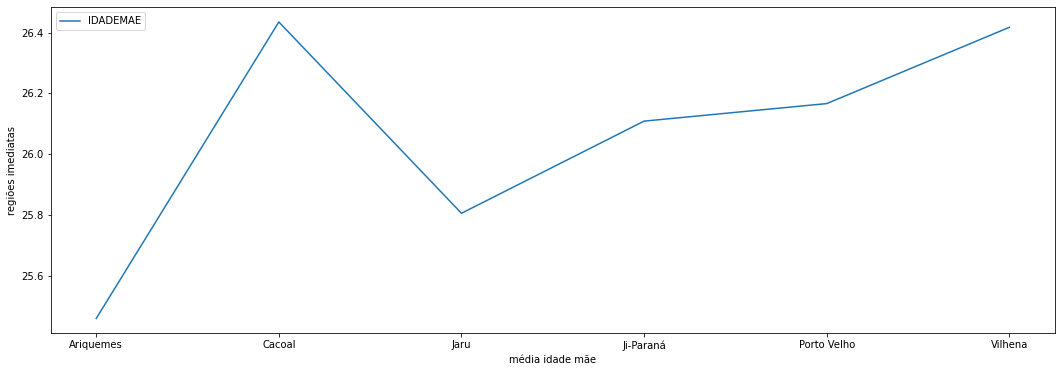

In [14]:
imediata_RO = sinasc_raw.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])

plt.xlabel('média idade mãe')

plt.ylabel('regiões imediatas')

imediata_RO

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [15]:
lista_idh = {
        "Porto Velho": "IDH Alto",
        "Vilhena": "IDH Alto",
        "Cacoal": "IDH Alto",
        "Ji-Paraná": "IDH Alto",
        "Pimenta Bueno": "IDH Alto",
        "Ariquemes": "IDH Alto",
        "Rolim de Moura": "IDH Alto",
        "Cerejeiras": "IDH Médio",
        "Jaru": "IDH Médio",
        "Colorado do Oeste": "IDH Médio",
        "Ouro Preto do Oeste": "IDH Médio",
        "Espigão d'Oeste": "IDH Médio",
        "Santa Luzia d'Oeste": "IDH Médio",
        "Pimenteiras do Oeste": "IDH Médio",
        "Presidente Médici": "IDH Médio",
        "Castanheiras": "IDH Médio",
        "Guajará-Mirim": "IDH Médio",
        "Chupinguaia": "IDH Médio",
        "Cabixi": "IDH Médio",
        "Candeias do Jamari": "IDH Médio",
        "São Felipe d'Oeste": "IDH Médio",
        "Cacaulândia": "IDH Médio",
        "São Miguel do Guaporé": "IDH Médio",
        "Mirante da Serra": "IDH Médio",
        "Alvorada d'Oeste": "IDH Médio",
        "Teixeirópolis": "IDH Médio",
        "Nova Brasilândia d'Oeste": "IDH Médio",
        "Rio Crespo": "IDH Médio",
        "Primavera de Rondônia": "IDH Médio",
        "Alta Floresta d'Oeste": "IDH Médio",
        "Ministro Andreazza": "IDH Médio",
        "Novo Horizonte do Oeste": "IDH Médio",
        "Vale do Paraíso": "IDH Médio",
        "Alto Paraíso": "IDH Médio",
        "Parecis": "IDH Médio",
        "Buritis": "IDH Médio",
        "Itapuã do Oeste": "IDH Médio",
        "Corumbiara": "IDH Médio",
        "Cujubim": "IDH Médio",
        "Costa Marques": "IDH Médio",
        "São Francisco do Guaporé": "IDH Médio",
        "Urupá": "IDH Médio",
        "Monte Negro": "IDH Médio",
        "Seringueiras": "IDH Baixo",
        "Governador Jorge Teixeira": "IDH Baixo",
        "Machadinho d'Oeste": "IDH Baixo",
        "Campo Novo de Rondônia": "IDH Baixo",
        "Alto Alegre dos Parecis": "IDH Baixo",
        "Theobroma": "IDH Baixo",
        "Nova União": "IDH Baixo",
        "Nova Mamoré": "IDH Baixo",
        "Vale do Anari": "IDH Baixo"
}

In [16]:
sinasc_raw.set_index('munResNome')['CONSPRENAT'].groupby(lista_idh).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
IDH Alto,132898.0,8.239692,0.0,99.0,8.0,5.608648,31.456929
IDH Baixo,10465.0,8.106119,0.0,99.0,8.0,3.694796,13.651521
IDH Médio,56866.0,8.398464,0.0,99.0,8.0,4.630178,21.438544


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [17]:
lista_ifmd = {
    "Ariquemes": "IFDM Moderado",
    "Vilhena": "IFDM Moderado",
    "Pimenta Bueno": "IFDM Moderado",
    "Porto Velho": "IFDM Moderado",
    "Ji-Paraná": "IFDM Moderado",
    "Cacoal": "IFDM Moderado",
    "Santa Luzia d'Oeste": "IFDM Moderado",
    "Rolim de Moura": "IFDM Moderado",
    "Chupinguaia": "IFDM Moderado",
    "São Miguel do Guaporé": "IFDM Moderado",
    "Pimenteiras do Oeste": "IFDM Moderado",
    "Teixeirópolis": "IFDM Moderado",
    "Colorado do Oeste": "IFDM Moderado",
    "Jaru": "IFDM Moderado",
    "Rio Crespo": "IFDM Moderado",
    "Primavera de Rondônia": "IFDM Moderado",
    "Alta Floresta d'Oeste": "IFDM Moderado",
    "Ouro Preto do Oeste": "IFDM Moderado",
    "São Francisco do Guaporé": "IFDM Moderado",
    "Candeias do Jamari": "IFDM Moderado",
    "Buritis": "IFDM Moderado",
    "São Felipe d'Oeste": "IFDM Moderado",
    "Presidente Médici": "IFDM Moderado",
    "Cerejeiras": "IFDM Moderado",
    "Monte Negro": "IFDM Moderado",
    "Urupá": "IFDM Moderado",
    "Espigão d'Oeste": "IFDM Regular",
    "Seringueiras": "IFDM Regular",
    "Alvorada d'Oeste": "IFDM Regular",
    "Itapuã do Oeste": "IFDM Regular",
    "Cabixi": "IFDM Regular",
    "Novo Horizonte do Oeste": "IFDM Regular",
    "Nova Brasilândia d'Oeste": "IFDM Regular",
    "Vale do Paraíso": "IFDM Regular",
    "Corumbiara": "IFDM Regular",
    "Alto Paraíso": "IFDM Regular",
    "Cacaulândia": "IFDM Regular",
    "Vale do Anari": "IFDM Regular",
    "Ministro Andreazza": "IFDM Regular",
    "Costa Marques": "IFDM Regular",
    "Nova União": "IFDM Regular",
    "Guajará-Mirim": "IFDM Regular",
    "Mirante da Serra": "IFDM Regular",
    "Parecis": "IFDM Regular",
    "Castanheiras": "IFDM Regular",
    "Theobroma": "IFDM Regular",
    "Machadinho d'Oeste": "IFDM Regular",
    "Campo Novo de Rondônia": "IFDM Regular",
    "Nova Mamoré": "IFDM Regular",
    "Cujubim": "IFDM Regular",
    "Alto Alegre dos Parecis": "IFDM Regular",
    "Governador Jorge Teixeira": "IFDM Regular"
}

In [18]:
sinasc_raw.set_index('munResNome')['CONSPRENAT'].groupby(lista_ifmd).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
IFDM Moderado,171932.0,8.333673,0.0,99.0,8.0,5.463957,29.854823
IFDM Regular,28297.0,7.948596,0.0,99.0,8.0,3.891316,15.142341


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [19]:
lista_pib = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [20]:
sinasc_raw.set_index('munResNome')['CONSPRENAT'].groupby(lista_pib).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,140953.0,8.291353,0.0,99.0,8.0,5.546354,30.762041
Acima de 100 Milhões,15722.0,8.686188,0.0,99.0,8.0,3.607448,13.013684
Acima de 200 Milhões,4161.0,8.126953,1.0,38.0,8.0,2.686761,7.218685
Acima de 300 Milhões,10844.0,8.745161,0.0,99.0,8.0,5.574897,31.079476
Acima de 500 Milhões,25368.0,7.786372,0.0,99.0,8.0,4.852232,23.544156
Até 100 Milhões,3181.0,8.574124,1.0,41.0,9.0,3.073299,9.445166


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

 - No primeiro gráfico mostra que a cidade de Cacoal possuí a maior média da idade das Mães;
 
 
 - A maior variação de PIB por consulta pre natal é acima de 300 milhões, chegando a uma var de 31.07;
 
 
 - Ariquemes tem a menor média da Idade de mães.